# Análisis de datos de actividad física

### Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ----------------------------------------------------------------------
from sklearn import svm, neighbors
from sklearn.svm import SVC, SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
# ----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Lectura de archivos

In [ ]:
p300_K = pd.read_csv('prueba_1_kun.txt', delimiter = '\s+', header = None)
p300_D = pd.read_csv('prueba_1_diego.txt', delimiter = '\s+', header = None)
p300_A = pd.read_csv('prueba_1_anna.txt', delimiter = '\s+', header = None)
# ----------------------------------------------------------------------
cogn_K = pd.read_csv('prueba_2_kun.txt', delimiter = '\s+', header = None)
cogn_D = pd.read_csv('prueba_2_diego.txt', delimiter = '\s+', header = None)
cogn_A = pd.read_csv('prueba_2_anna.txt', delimiter = '\s+', header = None)
# ----------------------------------------------------------------------
p300_K = p300_K.dropna(axis=1)
p300_D = p300_D.dropna(axis=1)
p300_A = p300_A.dropna(axis=1)
# ----------------------------------------------------------------------
cogn_K = cogn_K.dropna(axis=1)
cogn_D = cogn_D.dropna(axis=1)
cogn_A = cogn_A.dropna(axis=1)

In [ ]:
np.loadtxt('prueba_2_anna.txt')

array([[ 1.        ,  1.        , 13.58921468, ...,  2.70268374,
         4.10002656,  4.61562349],
       [ 1.        ,  1.        , 14.48481062, ...,  2.62078523,
         2.21964575,  4.59147298],
       [ 1.        ,  1.        , 30.32407016, ...,  2.35728066,
         2.70299926,  4.45747389],
       ...,
       [13.        ,  1.        , 54.93601451, ...,  2.69458245,
         2.37638191,  5.04033967],
       [13.        ,  1.        , 26.67749078, ...,  1.98004218,
         2.35889425,  3.14819618],
       [13.        ,  1.        , 32.87805588, ...,  1.72114719,
         2.54518601,  6.26253826]])

# Incisos 1 y 2:

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [ ]:
kf = StratifiedKFold(n_splits = 25, shuffle = True)

## P300 vs no P300



In [ ]:
# X Y de P300
x_K_p300 = p300_K.iloc[: , 1:]
y_K_p300 = p300_K.iloc[: , 0]
# ------------------------
x_D_p300 = p300_D.iloc[: , 1:]
y_D_p300 = p300_D.iloc[: , 0]
# ------------------------
x_A_p300 = p300_A.iloc[: , 1:]
y_A_p300 = p300_A.iloc[: , 0]

### SVM - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_p300, y_K_p300):
  # Training phase
  X_train = x_K_p300.iloc[train_index, :]
  y_train = y_K_p300.iloc[train_index]

  clf = make_pipeline(svm.SVC(class_weight='balanced'))
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_p300.iloc[test_index, :]
  y_test = y_K_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7912077922077921
RECALL =  [0.58818182 0.84218182]


### SVM - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_p300, y_D_p300):
  # Training phase
  X_train = x_D_p300.iloc[train_index, :]
  y_train = y_D_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC(class_weight='balanced'))
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_p300.iloc[test_index, :]
  y_test = y_D_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8356493506493505
RECALL =  [0.66333333 0.87890909]


### SVM - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_p300, y_A_p300):
  # Training phase
  X_train = x_A_p300.iloc[train_index, :]
  y_train = y_A_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC(class_weight='balanced'))
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_p300.iloc[test_index, :]
  y_test = y_A_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8779480519480516
RECALL =  [0.64454545 0.93618182]


### KNN - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_p300, y_K_p300):
  # Training phase
  X_train = x_K_p300.iloc[train_index, :]
  y_train = y_K_p300.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_K_p300.iloc[test_index, :]
  y_test = y_K_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6197012987012986
RECALL =  [0.65545455 0.61070707]


### KNN - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_p300, y_D_p300):
  # Training phase
  X_train = x_D_p300.iloc[train_index, :]
  y_train = y_D_p300.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_D_p300.iloc[test_index, :]
  y_test = y_D_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6165714285714285
RECALL =  [0.71818182 0.59157576]


### KNN - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_p300, y_A_p300):
  # Training phase
  X_train = x_A_p300.iloc[train_index, :]
  y_train = y_A_p300.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_A_p300.iloc[test_index, :]
  y_test = y_A_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7135324675324677
RECALL =  [0.77030303 0.69911111]


### MLP - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_p300, y_K_p300):
  # Training phase
  X_train = x_K_p300.iloc[train_index, :]
  y_train = y_K_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=[200, 200], max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_p300.iloc[test_index, :]
  y_test = y_K_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7566493506493508
RECALL =  [0.40393939 0.84474747]


### MLP - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_p300, y_D_p300):
  # Training phase
  X_train = x_D_p300.iloc[train_index, :]
  y_train = y_D_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_p300.iloc[test_index, :]
  y_test = y_D_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7946493506493507
RECALL =  [0.47       0.87620202]


### MLP - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_p300, y_A_p300):
  # Training phase
  X_train = x_A_p300.iloc[train_index, :]
  y_train = y_A_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_p300.iloc[test_index, :]
  y_test = y_A_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8162727272727271
RECALL =  [0.56181818 0.87975758]


### Logistic Regression - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_p300, y_K_p300):
  # Training phase
  X_train = x_K_p300.iloc[train_index, :]
  y_train = y_K_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_p300.iloc[test_index, :]
  y_test = y_K_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7428961038961037
RECALL =  [0.70181818 0.7529899 ]


### Logistic Regression - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_p300, y_D_p300):
  # Training phase
  X_train = x_D_p300.iloc[train_index, :]
  y_train = y_D_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_p300.iloc[test_index, :]
  y_test = y_D_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7868961038961038
RECALL =  [0.75424242 0.79553535]


### Logistic Regression - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_p300, y_A_p300):
  # Training phase
  X_train = x_A_p300.iloc[train_index, :]
  y_train = y_A_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_p300.iloc[test_index, :]
  y_test = y_A_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7832207792207794
RECALL =  [0.74939394 0.79193939]


### Random Forest - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_p300, y_K_p300):
  # Training phase
  X_train = x_K_p300.iloc[train_index, :]
  y_train = y_K_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_p300.iloc[test_index, :]
  y_test = y_K_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8090519480519481
RECALL =  [0.06424242 0.99551515]


### Random Forest - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_p300, y_D_p300):
  # Training phase
  X_train = x_D_p300.iloc[train_index, :]
  y_train = y_D_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_p300.iloc[test_index, :]
  y_test = y_D_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8204805194805194
RECALL =  [0.12909091 0.99367677]


### Random Forest - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_p300, y_A_p300):
  # Training phase
  X_train = x_A_p300.iloc[train_index, :]
  y_train = y_A_p300.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced'))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_p300.iloc[test_index, :]
  y_test = y_A_p300.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8385064935064933
RECALL =  [0.20484848 0.99733333]


## Clasificación de tarea de cálculo (9-12) vs tarea de lectura (5-8) vs tarea de nombres de cosas (1-4)


In [ ]:
# X Y de Cognitivas 1
transformacion = lambda x: 1 if 1 <= x <= 4 else 2 if 5 <= x <= 8 else 3 if 9 <= x <= 12 else 4
cogn_K[0] = cogn_K[0].map(transformacion)
cogn_D[0] = cogn_K[0].map(transformacion)
cogn_A[0] = cogn_K[0].map(transformacion)

cogn_K = cogn_K[cogn_K.iloc[:, 0] != 4]
cogn_D = cogn_D[cogn_D.iloc[:, 0] != 4]
cogn_A = cogn_A[cogn_A.iloc[:, 0] != 4]

x_K_cogn1 = cogn_K.iloc[: , 1:]
y_K_cogn1 = cogn_K.iloc[: , 0]
# ------------------------
x_D_cogn1 = cogn_D.iloc[: , 1:]
y_D_cogn1 = cogn_D.iloc[: , 0]
# ------------------------
x_A_cogn1 = cogn_A.iloc[: , 1:]
y_A_cogn1 = cogn_A.iloc[: , 0]

In [ ]:
x_A_cogn1

,1,2,3,4,5,6,7,8,9,10,...,208,209,210,211,212,213,214,215,216,217
0,1,13.589215,4.930113,5.037298,5.399706,3.855637,7.199374,4.147996,4.041664,15.867199,...,4.272583,4.590192,1.818205,3.574539,3.537578,2.765890,3.230438,2.702684,4.100027,4.615623
1,1,14.484811,13.468368,11.608648,11.080092,15.607551,14.468629,11.027060,13.116093,16.086787,...,2.224896,4.433079,1.432296,1.937020,1.702001,1.663586,3.979139,2.620785,2.219646,4.591473
2,1,30.324070,6.244942,7.720269,6.448223,16.601164,8.747081,12.246845,12.574046,29.371041,...,3.038462,4.678217,2.129459,2.004390,1.811863,2.332928,3.567157,2.357281,2.702999,4.457474
3,1,63.120006,9.379032,10.439838,8.418659,9.579456,10.132894,8.576532,18.389324,65.061691,...,2.672958,4.325579,0.910288,2.396694,1.990245,2.539628,3.801424,2.294501,3.042093,4.419387
4,1,52.741647,22.706534,28.686197,22.525542,8.707877,12.946745,12.638979,5.205497,49.869484,...,3.539110,7.451203,1.506966,1.716617,1.798808,2.882234,3.728661,2.288489,3.277372,6.887009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,62.861230,18.956727,25.755759,18.226450,11.761670,13.735699,11.720559,9.265123,65.055102,...,1.600426,4.646996,3.243211,5.234852,3.060580,1.816058,4.809035,2.181769,1.732151,5.478087
270,1,26.781047,10.457307,16.133185,15.623345,10.524350,14.519872,8.772173,14.181254,28.346753,...,3.190445,6.488122,0.927818,2.391781,1.132775,1.379219,3.905555,2.053330,2.713932,6.480963
271,1,54.936015,11.867940,13.159651,15.226288,8.505499,11.437454,13.648042,7.156582,57.102353,...,2.327505,4.045973,1.666624,1.740621,2.363356,2.427023,4.696204,2.694582,2.376382,5.040340
272,1,26.677491,18.767400,14.174545,9.333927,12.748328,18.095664,5.242327,8.390074,28.251695,...,2.889564,3.244077,0.973662,1.740264,1.785302,1.858781,3.168883,1.980042,2.358894,3.148196


### SVM - Kun

In [ ]:
acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):
  # Training phase
  X_train = x_K_cogn1.iloc[train_index, :]
  y_train = y_K_cogn1.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC())
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn1.iloc[test_index, :]
  y_test = y_K_cogn1.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
  recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.41238095238095235
RECALL =  [0.34666667 0.54666667 0.33333333]


### KNN - Kun

In [ ]:
acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):
  # Training phase
  X_train = x_K_cogn1.iloc[train_index, :]
  y_train = y_K_cogn1.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_K_cogn1.iloc[test_index, :]
  y_test = y_K_cogn1.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
  recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.43142857142857144
RECALL =  [0.54 0.32 0.46]


### MLP - Kun

In [ ]:
acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):
  # Training phase
  X_train = x_K_cogn1.iloc[train_index, :]
  y_train = y_K_cogn1.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn1.iloc[test_index, :]
  y_test = y_K_cogn1.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
  recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.3971428571428571
RECALL =  [0.34666667 0.46       0.38666667]


### Logistic Regression - Kun

In [ ]:
acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):
  # Training phase
  X_train = x_K_cogn1.iloc[train_index, :]
  y_train = y_K_cogn1.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn1.iloc[test_index, :]
  y_test = y_K_cogn1.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
  recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.48190476190476195
RECALL =  [0.38666667 0.6        0.44666667]


### Random Forest - Kun

In [ ]:
acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):
  # Training phase
  X_train = x_K_cogn1.iloc[train_index, :]
  y_train = y_K_cogn1.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn1.iloc[test_index, :]
  y_test = y_K_cogn1.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
  recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.4019047619047619
RECALL =  [0.38       0.47333333 0.37333333]


## Clasificación de no tarea cognitiva (cruz) vs tarea cognitiva

In [ ]:
cogn_K = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Anna/prueba_2_kun.txt', delimiter = '\s+', header = None)
cogn_D = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Anna/prueba_2_diego.txt', delimiter = '\s+', header = None)
cogn_A = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Anna/prueba_2_anna.txt', delimiter = '\s+', header = None)

# X Y de Cognitivas 2
transformacion = lambda x: 1 if 1 <= x <= 4 else 2 if 5 <= x <= 8 else 3 if 9 <= x <= 12 else 4
cogn_K[0] = cogn_K[0].map(transformacion)
cogn_D[0] = cogn_K[0].map(transformacion)
cogn_A[0] = cogn_K[0].map(transformacion)
transformacion = lambda x: 1 if 1 <= x <= 3 else 4
cogn_K[0] = cogn_K[0].map(transformacion)
cogn_D[0] = cogn_K[0].map(transformacion)
cogn_A[0] = cogn_K[0].map(transformacion)

x_K_cogn2 = cogn_K.iloc[: , 1:]
y_K_cogn2 = cogn_K.iloc[: , 0]
# ------------------------
x_D_cogn2 = cogn_D.iloc[: , 1:]
y_D_cogn2 = cogn_D.iloc[: , 0]
# ------------------------
x_A_cogn2 = cogn_A.iloc[: , 1:]
y_A_cogn2 = cogn_A.iloc[: , 0]

### SVM - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_cogn2, y_K_cogn2):
  # Training phase
  X_train = x_K_cogn2.iloc[train_index, :]
  y_train = y_K_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC())
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6327272727272726
RECALL =  [0.87047619 0.26      ]


### SVM - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):
  # Training phase
  X_train = x_D_cogn2.iloc[train_index, :]
  y_train = y_D_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC())
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_cogn2.iloc[test_index, :]
  y_test = y_D_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8069090909090909
RECALL =  [0.93333333 0.608     ]


### SVM - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_cogn2, y_A_cogn2):
  # Training phase
  X_train = x_A_cogn2.iloc[train_index, :]
  y_train = y_A_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), svm.SVC())
  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_cogn2.iloc[test_index, :]
  y_test = y_A_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7112727272727273
RECALL =  [0.90571429 0.402     ]


### KNN - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_cogn2, y_K_cogn2):
  # Training phase
  X_train = x_K_cogn2.iloc[train_index, :]
  y_train = y_K_cogn2.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.5345454545454545
RECALL =  [0.45238095 0.668     ]


### KNN - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):
  # Training phase
  X_train = x_D_cogn2.iloc[train_index, :]
  y_train = y_D_cogn2.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_D_cogn2.iloc[test_index, :]
  y_test = y_D_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7701818181818182
RECALL =  [0.89904762 0.558     ]


### KNN - Ana

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_cogn2, y_A_cogn2):
  # Training phase
  X_train = x_A_cogn2.iloc[train_index, :]
  y_train = y_A_cogn2.iloc[train_index]

  rus = RandomUnderSampler(random_state=42)
  X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

  clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = int(7)))
  clf.fit(X_train_rus, y_train_rus)

  # Test phase
  X_test = x_A_cogn2.iloc[test_index, :]
  y_test = y_A_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.616
RECALL =  [0.66571429 0.536     ]


### MLP - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_cogn2, y_K_cogn2):
  # Training phase
  X_train = x_K_cogn2.iloc[train_index, :]
  y_train = y_K_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.578181818181818
RECALL =  [0.62666667 0.508     ]


### MLP - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):
  # Training phase
  X_train = x_D_cogn2.iloc[train_index, :]
  y_train = y_D_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.4992727272727273
RECALL =  [0.44285714 0.578     ]


### MLP - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_cogn2, y_A_cogn2):
  # Training phase
  X_train = x_A_cogn2.iloc[train_index, :]
  y_train = y_A_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, max_iter=1000))

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_cogn2.iloc[test_index, :]
  y_test = y_A_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6421818181818182
RECALL =  [0.72285714 0.52      ]


### Logistic Regression - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_cogn2, y_K_cogn2):
  # Training phase
  X_train = x_K_cogn2.iloc[train_index, :]
  y_train = y_K_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6436363636363635
RECALL =  [0.71619048 0.526     ]


### Logistic Regression - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):
  # Training phase
  X_train = x_D_cogn2.iloc[train_index, :]
  y_train = y_D_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_cogn2.iloc[test_index, :]
  y_test = y_D_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7883636363636362
RECALL =  [0.86095238 0.668     ]


### Logistic Regression - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_cogn2, y_A_cogn2):
  # Training phase
  X_train = x_A_cogn2.iloc[train_index, :]
  y_train = y_A_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), LogisticRegression())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_cogn2.iloc[test_index, :]
  y_test = y_A_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.7192727272727272
RECALL =  [0.80380952 0.59      ]


### Random Forest - Kun

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_K_cogn2, y_K_cogn2):
  # Training phase
  X_train = x_K_cogn2.iloc[train_index, :]
  y_train = y_K_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_K_cogn2.iloc[test_index, :]
  y_test = y_K_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6363636363636364
RECALL =  [0.81047619 0.364     ]


### Random Forest - Diego

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):
  # Training phase
  X_train = x_D_cogn2.iloc[train_index, :]
  y_train = y_D_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_D_cogn2.iloc[test_index, :]
  y_test = y_D_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.8138181818181817
RECALL =  [0.91142857 0.66      ]


### Random Forest - Anna

In [ ]:
acc = 0
recall = np.array([0., 0.])

for train_index, test_index in kf.split(x_A_cogn2, y_A_cogn2):
  # Training phase
  X_train = x_A_cogn2.iloc[train_index, :]
  y_train = y_A_cogn2.iloc[train_index]

  clf = make_pipeline(StandardScaler(), RandomForestClassifier())

  clf.fit(X_train, y_train)

  # Test phase
  X_test = x_A_cogn2.iloc[test_index, :]
  y_test = y_A_cogn2.iloc[test_index]
  y_pred = clf.predict(X_test)

  # Results
  cm = confusion_matrix(y_test, y_pred)

  acc += (cm[0,0]+cm[1,1])/len(y_test)

  recall[0] += cm[0,0]/(cm[0,0] + cm[0,1])
  recall[1] += cm[1,1]/(cm[1,0] + cm[1,1])

acc = acc/25
print('ACC = ', acc)
recall = recall/25
print('RECALL = ', recall)

ACC =  0.6534545454545454
RECALL =  [0.83333333 0.374     ]


# Inciso 3:

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos

## Hiperparámetros de los clasificadores

### SVM
- **C**: Parámetro de regularización. Debe ser estrictamente positiva.
- **kernel**: Especifica el tipo de kernel que se utilizará en el algoritmo. Si no se da ninguno, se utilizará 'rbf'. Si se da un llamable, se utiliza para calcular previamente la matriz del kernel a partir de matrices de datos. Esa matriz debe ser una matriz de forma (n_samples, n_samples).

### KNN
- **n_neighbors**: Número de vecinos que se usarán de forma predeterminada para las consultas kneighbors.

### MLP
- **hidden_layer_sizes**: El elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.
- **activation**: Función de activación para la capa oculta.

### Logistic Regression
- **penalty**: Especifique la norma de la pena:

  - **none**: no se añade ninguna penalización;

  - **l2**: agregue un término de penalización L2 y es la opción predeterminada;

  - **l1**: añadir una penalización L1;

  - **elasticnet**: se añaden los términos de penalización L1 y L2.

### Random Forest
- **n_estimators**: Número de árboles en el 'forest'.

### P300 vs no P300

In [ ]:
x = p300.iloc[: , 1:]
y = p300.iloc[: , 0]

models = {'MLP': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

hyperparameters = {'MLP':{'hidden_layer_sizes': [(16,), (16, 8), (32, 16)],
                          'activation': ['relu', 'logistic']}}

grid_search = GridSearchCV(models['MLP'], hyperparameters['MLP'], cv=3)
grid_search.fit(x, y)

best_params = grid_search.best_params_

print(f"Hiperparámetros óptimos para {'MLP'}:")
print(best_params)

### Clasificación de tarea de cálculo (9-12) vs tarea de lectura (5-8) vs tarea de nombres de cosas (1-4)

In [ ]:
x = cogn_1.iloc[: , 1:]
y = cogn_1.iloc[: , 0]

models = {'MLP': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

hyperparameters = {'MLP':{'hidden_layer_sizes': [(16,), (16, 8), (32, 16)],
                          'activation': ['relu', 'logistic']}}

grid_search = GridSearchCV(models['MLP'], hyperparameters['MLP'], cv=3)
grid_search.fit(x, y)

best_params = grid_search.best_params_

print(f"Hiperparámetros óptimos para {'MLP'}:")
print(best_params)

### Clasificación de no tarea cognitiva (cruz) vs tarea cognitiva

In [ ]:
x = cogn_2.iloc[: , 1:]
y = cogn_2.iloc[: , 0]

models = {'MLP': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

hyperparameters = {'MLP':{'hidden_layer_sizes': [(16,), (16, 8), (32, 16)],
                          'activation': ['relu', 'logistic']}}

grid_search = GridSearchCV(models['MLP'], hyperparameters['MLP'], cv=3)
grid_search.fit(x, y)

best_params = grid_search.best_params_

print(f"Hiperparámetros óptimos para {'MLP'}:")
print(best_params)

# Inciso 4:

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

## P300 vs no P300

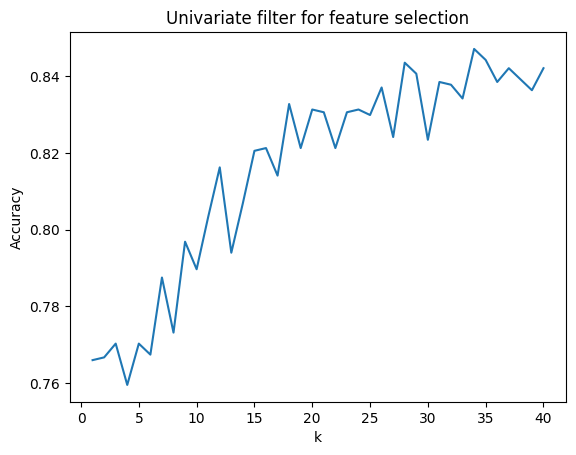

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 41, 1)
accs = []
clf = SVC(class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

for k in ks:
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x_A_p300, y_A_p300):

       # Training phase
        x_train = x_A_p300.iloc[train_index, :]
        y_train = y_A_p300.iloc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(x_A_p300.iloc[test_index, :])
        y_test = y_A_p300[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

## Clasificación de tarea de cálculo (9-12) vs tarea de lectura (5-8) vs tarea de nombres de cosas (1-4)

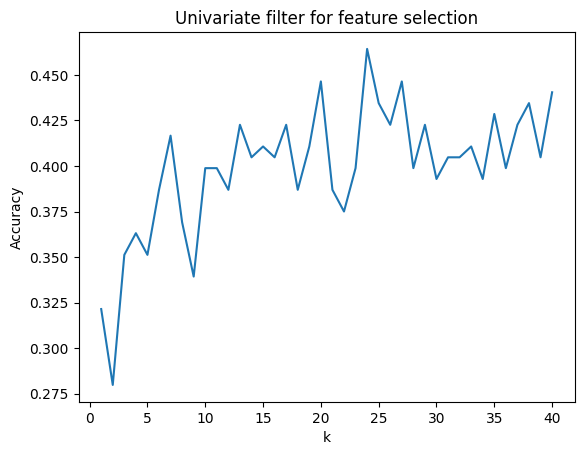

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 41, 1)
accs = []
clf = SVC(class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

for k in ks:
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x_K_cogn1, y_K_cogn1):

       # Training phase
        x_train = x_K_cogn1.iloc[train_index, :]
        y_train = y_K_cogn1.iloc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(x_K_cogn1.iloc[test_index, :])
        y_test = y_K_cogn1.iloc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

## Clasificación de no tarea cognitiva (cruz) vs tarea cognitiva

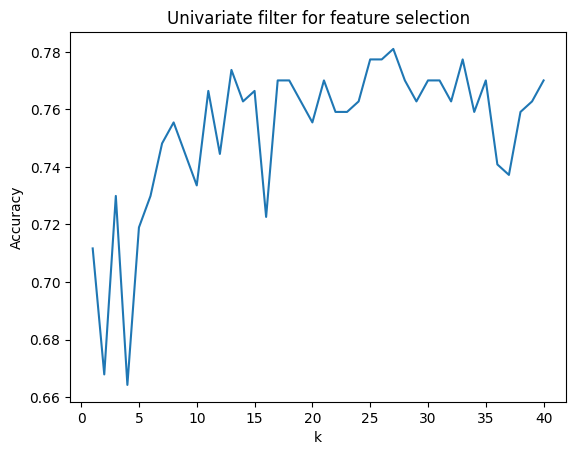

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 41, 1)
accs = []
clf = SVC(class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

for k in ks:
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x_D_cogn2, y_D_cogn2):

       # Training phase
        x_train = x_D_cogn2.iloc[train_index, :]
        y_train = y_D_cogn2.iloc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(x_D_cogn2.iloc[test_index, :])
        y_test = y_D_cogn2.iloc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

# Aprendizaje por transferencia

## SVC

### P300 vs no P300

In [ ]:
# Datos de entrenamiento: Anna
X_train = x_A_p300
y_train = y_A_p300

# Datos de prueba: Kun
X_test = x_K_p300
y_test = y_K_p300

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.23      0.24       279
           2       0.81      0.82      0.82      1114

    accuracy                           0.70      1393
   macro avg       0.53      0.53      0.53      1393
weighted avg       0.70      0.70      0.70      1393



## Logistic Regression

### P300 vs no P300

In [ ]:
# Datos de entrenamiento: Anna
X_train = x_A_p300
y_train = y_A_p300

# Datos de prueba: Kun
X_test = x_K_p300
y_test = y_K_p300

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.23      0.39      0.29       279
           2       0.82      0.68      0.74      1114

    accuracy                           0.62      1393
   macro avg       0.52      0.53      0.52      1393
weighted avg       0.70      0.62      0.65      1393

